# Overview

ML Clustering with K-Means – Customer Segmentation Analysis
Overview

This notebook focuses on unsupervised learning, a machine learning approach that analyzes unlabeled data to discover inherent structures, features, and groupings within a dataset. In particular, we will explore K-Means clustering, one of the most widely used clustering algorithms.

Clustering groups data points into clusters such that points within the same cluster are more similar to each other than to those in other clusters. This technique is commonly used for customer segmentation, which helps businesses understand buying patterns and tailor marketing or sales strategies.

In [93]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



In [65]:
df = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module02/ecommerce_eda2.csv')

# Cleaning For Clustering

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          9986 non-null   int64  
 1   OrderID        9986 non-null   object 
 2   OrderDate      9986 non-null   object 
 3   OrderWeekday   9986 non-null   object 
 4   OrderMonth     9986 non-null   int64  
 5   OrderQuarter   9986 non-null   object 
 6   OrderYear      9986 non-null   int64  
 7   ShipDate       9986 non-null   object 
 8   ShipMode       9986 non-null   object 
 9   CustomerID     9986 non-null   object 
 10  CustomerName   9986 non-null   object 
 11  Segment        9986 non-null   object 
 12  Country        9986 non-null   object 
 13  City           9986 non-null   object 
 14  State          9986 non-null   object 
 15  PostalCode     9986 non-null   int64  
 16  Region         9986 non-null   object 
 17  AddressID      9986 non-null   int64  
 18  ProductI

## Outliers

In [67]:
df.columns

Index(['RowID', 'OrderID', 'OrderDate', 'OrderWeekday', 'OrderMonth',
       'OrderQuarter', 'OrderYear', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'AddressID', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'SupplierPrice', 'Quantity', 'SalePrice', 'Discount',
       'Profit'],
      dtype='object')

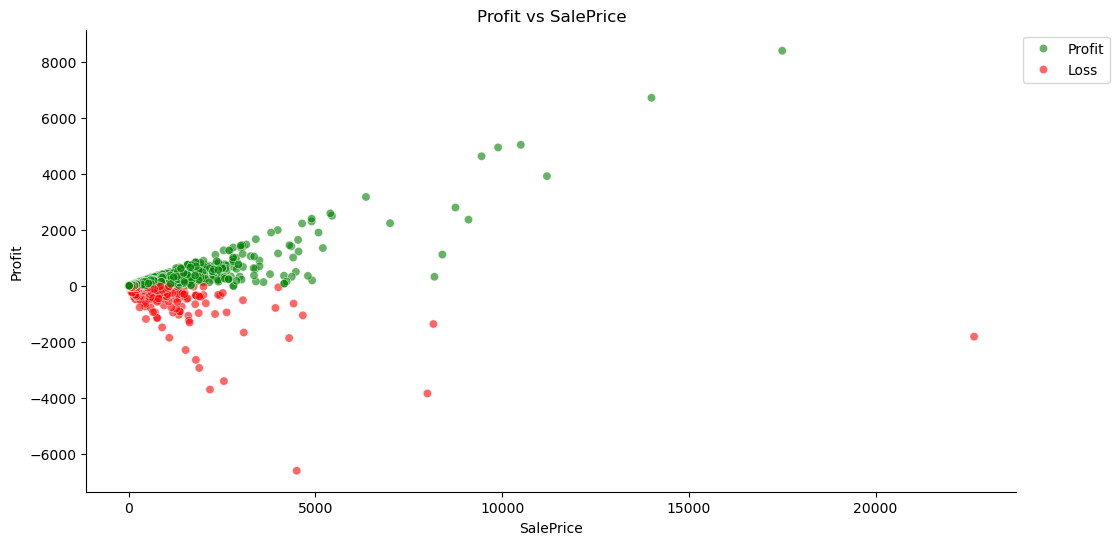

In [68]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df,
    x='SalePrice',
    y='Profit',
    hue=np.where(df['Profit'] >= 0, 'Profit', 'Loss'),  # on-the-fly labeling
    palette={'Profit':'green', 'Loss':'red'},
    alpha=0.6
)

plt.title('Profit vs SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Profit')

# Optional: move legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
plt.show()


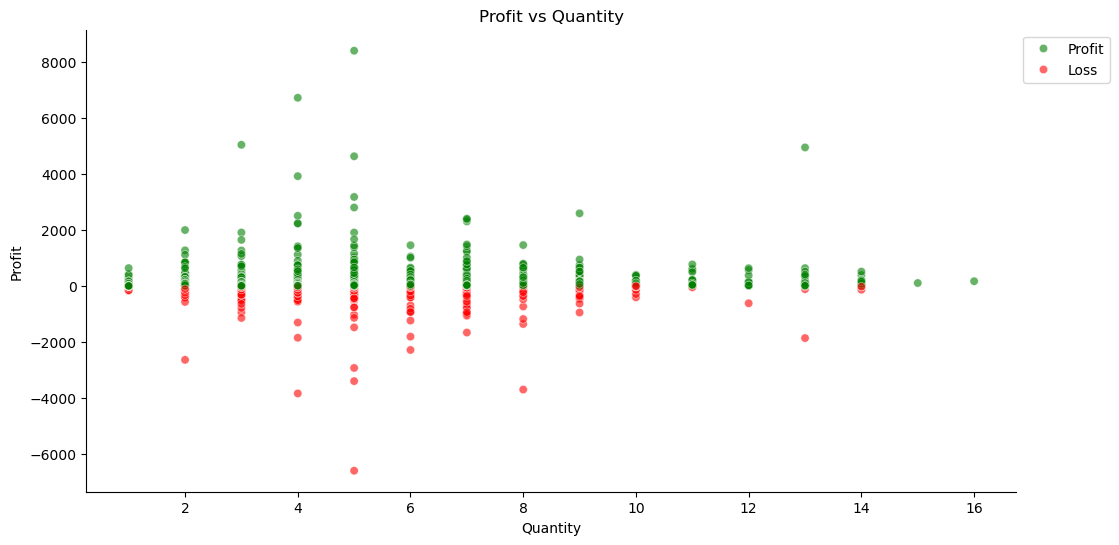

In [69]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df,
    x='Quantity',
    y='Profit',
    hue=np.where(df['Profit'] >= 0, 'Profit', 'Loss'),  # on-the-fly labeling
    palette={'Profit':'green', 'Loss':'red'},
    alpha=0.6
)

plt.title('Profit vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Profit')

# Optional: move legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
plt.show()


### Removing Outliers with IQR

In [70]:
numeric_cols = ['Profit', 'SalePrice', 'Quantity']

df_filtered = df.copy()

for col in numeric_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

df_filtered.shape  # see how many rows remain


(7209, 27)

In [71]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7209 entries, 2 to 9983
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          7209 non-null   int64  
 1   OrderID        7209 non-null   object 
 2   OrderDate      7209 non-null   object 
 3   OrderWeekday   7209 non-null   object 
 4   OrderMonth     7209 non-null   int64  
 5   OrderQuarter   7209 non-null   object 
 6   OrderYear      7209 non-null   int64  
 7   ShipDate       7209 non-null   object 
 8   ShipMode       7209 non-null   object 
 9   CustomerID     7209 non-null   object 
 10  CustomerName   7209 non-null   object 
 11  Segment        7209 non-null   object 
 12  Country        7209 non-null   object 
 13  City           7209 non-null   object 
 14  State          7209 non-null   object 
 15  PostalCode     7209 non-null   int64  
 16  Region         7209 non-null   object 
 17  AddressID      7209 non-null   int64  
 18  ProductID    

### Re-Visualise filtered DF

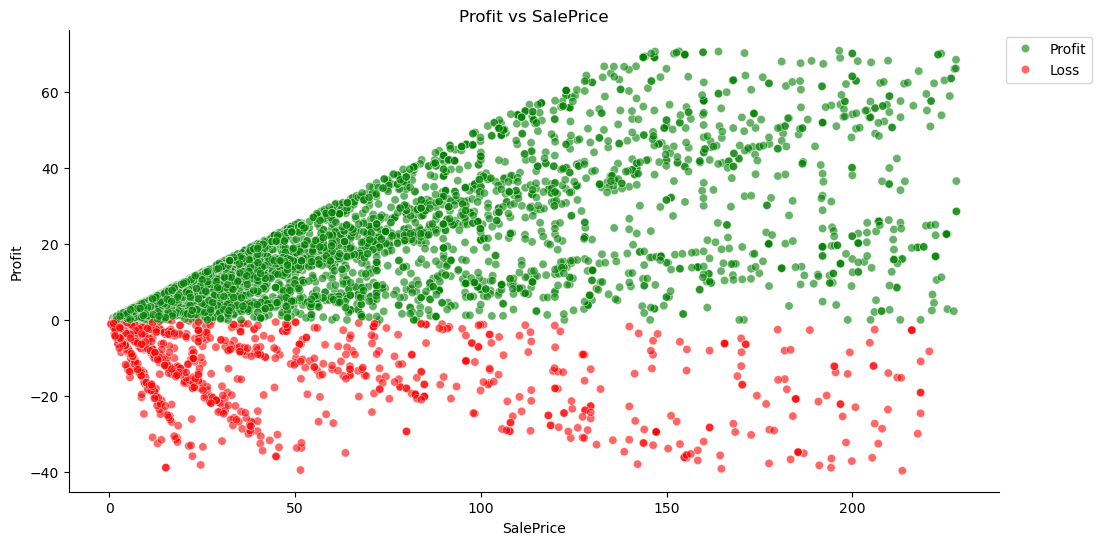

In [72]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_filtered,
    x='SalePrice',
    y='Profit',
    hue=np.where(df_filtered['Profit'] >= 0, 'Profit', 'Loss'),  # on-the-fly labeling
    palette={'Profit':'green', 'Loss':'red'},
    alpha=0.6
)

plt.title('Profit vs SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Profit')

# Optional: move legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
plt.show()


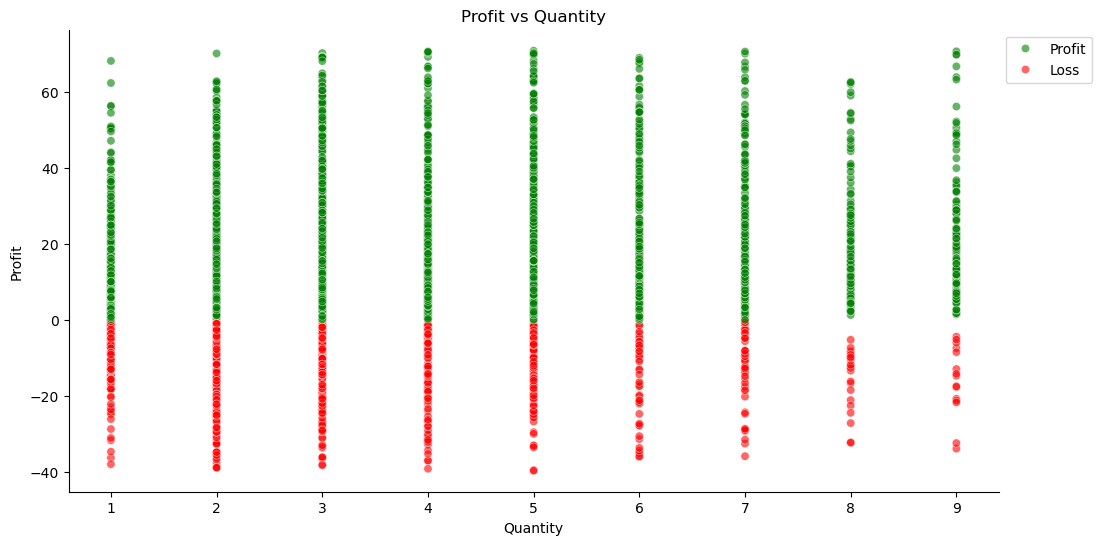

In [73]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_filtered,
    x='Quantity',
    y='Profit',
    hue=np.where(df_filtered['Profit'] >= 0, 'Profit', 'Loss'),  # on-the-fly labeling
    palette={'Profit':'green', 'Loss':'red'},
    alpha=0.6
)

plt.title('Profit vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Profit')

# Optional: move legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
plt.show()


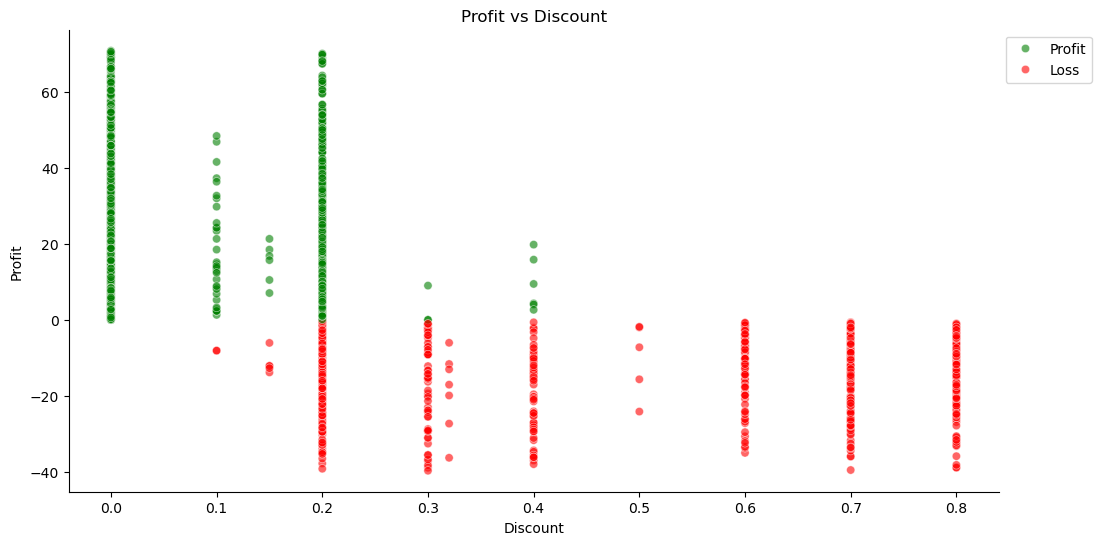

In [74]:
import numpy as np

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_filtered,
    x='Discount',
    y='Profit',
    hue=np.where(df_filtered['Profit'] >= 0, 'Profit', 'Loss'),
    palette={'Profit':'green', 'Loss':'red'},
    alpha=0.6
)

plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')

# Move legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
plt.show()


### Checkign if original CSV is similar to be sure there are no confusions. 

In [75]:
df_og = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module02/Sample-Superstore.csv', encoding='windows-1252')

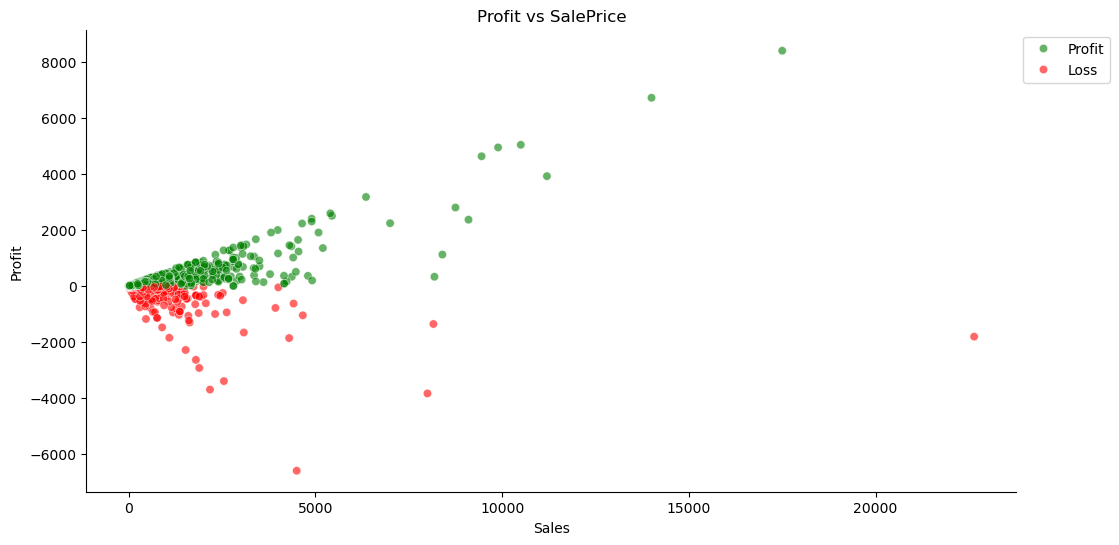

In [76]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_og,
    x='Sales',
    y='Profit',
    hue=np.where(df_og['Profit'] >= 0, 'Profit', 'Loss'),  # on-the-fly labeling
    palette={'Profit':'green', 'Loss':'red'},
    alpha=0.6
)

plt.title('Profit vs SalePrice')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Optional: move legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
plt.show()


### Conclusion:

#### DF has been filtered and now we have the data ready to be clustered. 

## Feature Scaling

### To Date Time

In [77]:
df_filtered['OrderDate'] = pd.to_datetime(df_filtered['OrderDate'])
df_filtered['ShipDate'] = pd.to_datetime(df_filtered['ShipDate'])


In [78]:
df_filtered[['OrderDate','ShipDate']].dtypes


OrderDate    datetime64[ns]
ShipDate     datetime64[ns]
dtype: object

### Recency

#### Find the latest date in our database.

In [79]:
latest_date = df_filtered['OrderDate'].max()
print("Latest order date in dataset:", latest_date)


Latest order date in dataset: 2017-12-30 00:00:00


#### Find the latest date each customer made an order. 

In [80]:
last_order = df_filtered.groupby('CustomerID')['OrderDate'].max()
recency = (latest_date - last_order).dt.days

recency_df = recency.reset_index()
recency_df.rename(columns={'OrderDate':'Recency'}, inplace=True)

recency_df


,CustomerID,Recency
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415
...,...,...
784,XP-21865,43
785,YC-21895,480
786,YS-21880,134
787,ZC-21910,54


### Frequency

In [81]:

frequency = df_filtered.groupby('CustomerID')['OrderID'].count()

frequency_df = frequency.reset_index()
frequency_df.rename(columns={'OrderID':'Frequency'}, inplace=True)

frequency_df


,CustomerID,Frequency
0,AA-10315,7
1,AA-10375,14
2,AA-10480,8
3,AA-10645,13
4,AB-10015,4
...,...,...
784,XP-21865,23
785,YC-21895,4
786,YS-21880,5
787,ZC-21910,23


### Monetary

In [82]:

monetary = df_filtered.groupby('CustomerID')['SalePrice'].sum()

monetary_df = monetary.reset_index()
monetary_df.rename(columns={'SalePrice':'Monetary'}, inplace=True)

monetary_df


,CustomerID,Monetary
0,AA-10315,165.00
1,AA-10375,556.41
2,AA-10480,354.59
3,AA-10645,816.80
4,AB-10015,301.25
...,...,...
784,XP-21865,1158.78
785,YC-21895,239.78
786,YS-21880,430.41
787,ZC-21910,1355.44


### Merge

In [83]:

rfm = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm = pd.merge(rfm, monetary_df, on='CustomerID')
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,AA-10315,184,7,165.00
1,AA-10375,19,14,556.41
2,AA-10480,259,8,354.59
3,AA-10645,55,13,816.80
4,AB-10015,415,4,301.25


### Outliers in RFM DF

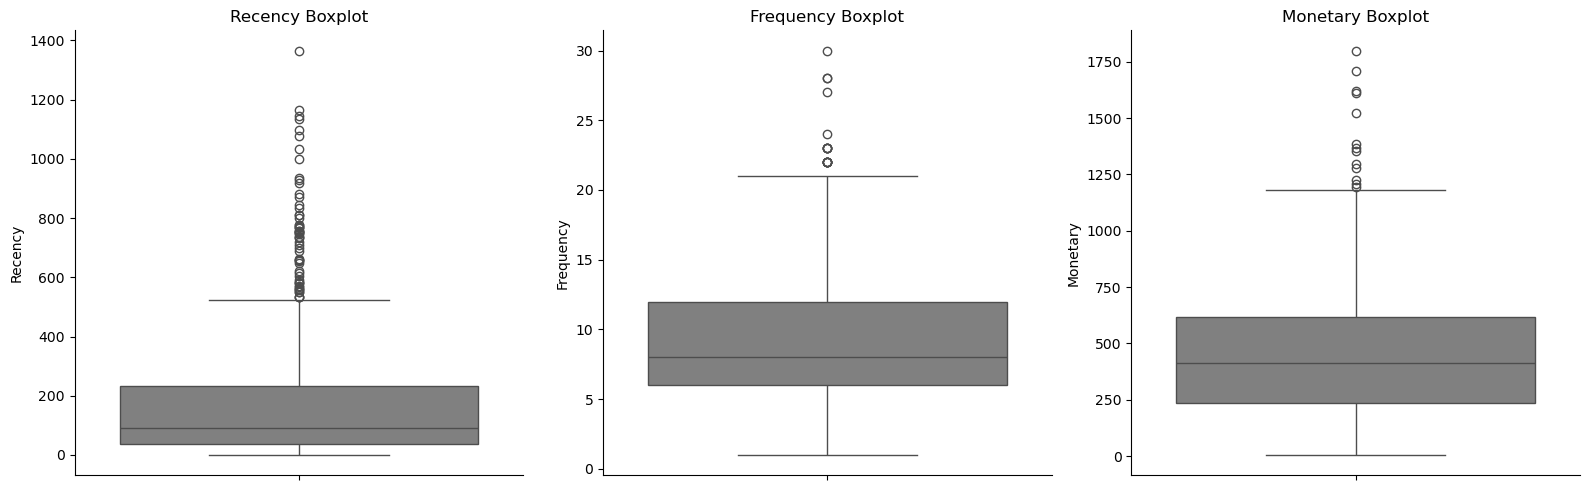

In [84]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm['Recency'], color='grey')
sns.despine()
plt.title('Recency Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm['Frequency'], color='grey')
sns.despine()
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm['Monetary'], color='grey')
sns.despine()
plt.title('Monetary Boxplot')

plt.tight_layout()
plt.show()


In [85]:
# # Copy your RFM table to avoid modifying the original
# rfm_filtered = rfm.copy()

# # Function to remove outliers based on IQR
# def remove_outliers(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.3 * IQR
#     upper_bound = Q3 + 1.3 * IQR
#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Apply to each RFM column
# for col in ['Recency', 'Frequency', 'Monetary']:
#     rfm_filtered = remove_outliers(rfm_filtered, col)

# # Check the filtered tablea
# rfm_filtered.shape


#### I have applied different Multiplier values to each column to get the best results trying to avoid overfitting. 

In [88]:
rfm_filtered = rfm.copy()

iqr_multipliers = {'Recency': 1.0, 'Frequency': 1.5, 'Monetary': 1.2}
mask = pd.Series(True, index=rfm.index)

for col, multiplier in iqr_multipliers.items():
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    mask &= (rfm[col] >= lower) & (rfm[col] <= upper)

rfm_filtered = rfm[mask]


#### Final Plot after removing Outliers

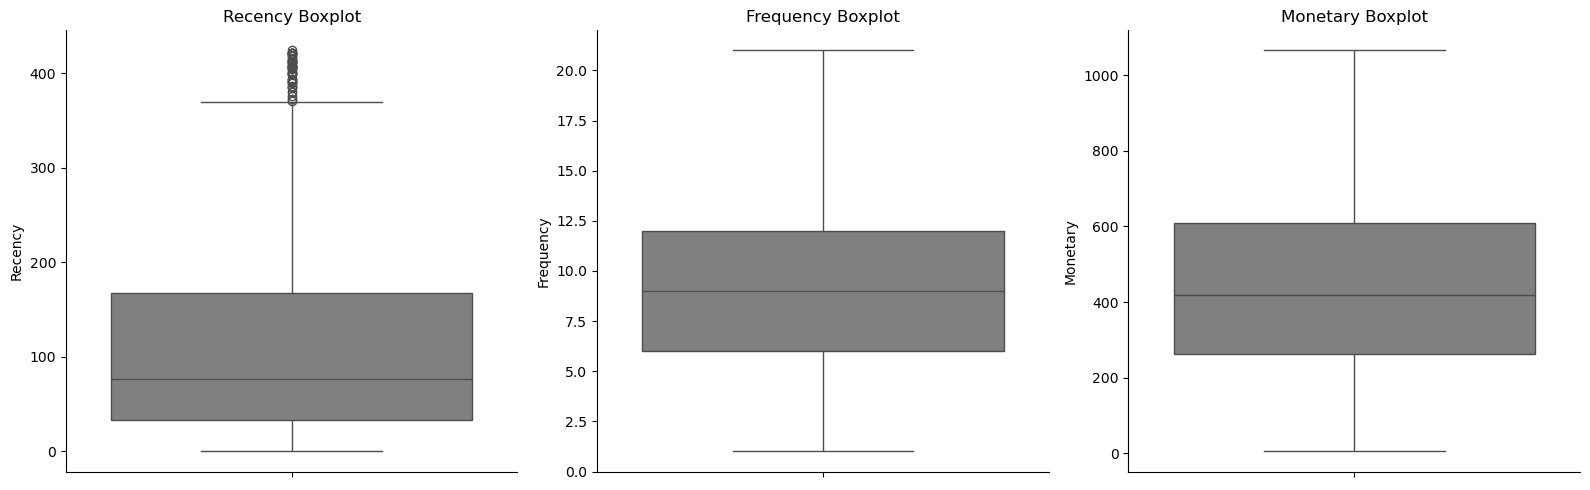

In [89]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_filtered['Recency'], color='grey')
sns.despine()
plt.title('Recency Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_filtered['Frequency'], color='grey')
sns.despine()
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_filtered['Monetary'], color='grey')
sns.despine()
plt.title('Monetary Boxplot')

plt.tight_layout()
plt.show()


In [92]:
rfm_filtered.describe()

,Recency,Frequency,Monetary
count,666.000000,666.000000,666.000000
mean,116.851351,9.042042,444.895841
std,113.214643,4.072062,239.317393
min,0.000000,1.000000,4.830000
25%,33.000000,6.000000,262.870000
50%,77.000000,9.000000,419.335000
75%,167.500000,12.000000,608.575000
max,424.000000,21.000000,1065.640000


#### Our features are on very different scales, and K-means is sensitive to scale. StandardScaler will make sure Recency, Frequency, and Monetary all contribute roughly equally to cluster formation.

### Applying StandardScaler

In [94]:

rfm_values = rfm_filtered[['Recency', 'Frequency', 'Monetary']]


scaler = StandardScaler()


rfm_scaled_array = scaler.fit_transform(rfm_values)


rfm_scaled = pd.DataFrame(rfm_scaled_array, columns=['Recency', 'Frequency', 'Monetary'])


rfm_scaled['CustomerID'] = rfm_filtered['CustomerID']


rfm_scaled.head()


,Recency,Frequency,Monetary,CustomerID
0,0.593555,-0.501853,-1.170438,AA-10315
1,-0.864949,1.218470,0.466318,AA-10375
2,1.256511,-0.256093,-0.377631,AA-10480
3,-0.546730,0.972709,1.555189,AA-10645
4,2.635461,-1.239134,-0.600683,AB-10015


In [95]:
new_order = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_scaled = rfm_scaled[new_order]

In [96]:
rfm_scaled.head()

,CustomerID,Recency,Frequency,Monetary
0,AA-10315,0.593555,-0.501853,-1.170438
1,AA-10375,-0.864949,1.218470,0.466318
2,AA-10480,1.256511,-0.256093,-0.377631
3,AA-10645,-0.546730,0.972709,1.555189
4,AB-10015,2.635461,-1.239134,-0.600683
